# Clockmon library analysis
In this notebook we retrieve $C_{\Sigma}$ and $C_{qr}$ from the capacitance matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modeling.clockmon.libraries.clockmon_library import clockmon_library, get_csigma_cqr
# from modeling.utils.qubits import get_csigma_cqr 

In [2]:
clockmon_lib = clockmon_library()
coupler_widths = np.linspace(20, 350, 1001)

In [3]:
c_sigmas, c_qrs = get_csigma_cqr(clockmon_lib(coupler_widths))

Text(0.5, 0, 'coupler length')

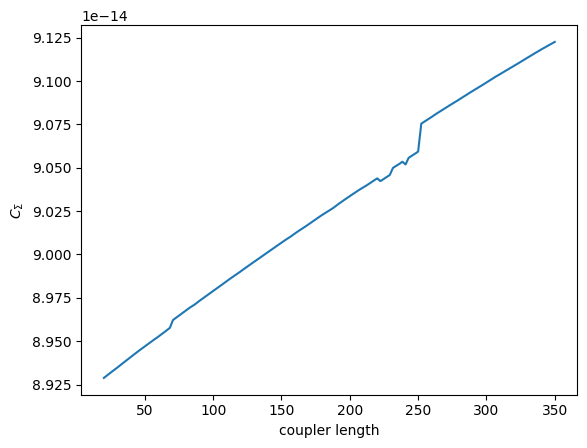

In [4]:
plt.plot(coupler_widths, c_sigmas)
plt.ylabel(r"$C_\Sigma$")
plt.xlabel("coupler length")

Text(0.5, 0, 'coupler length')

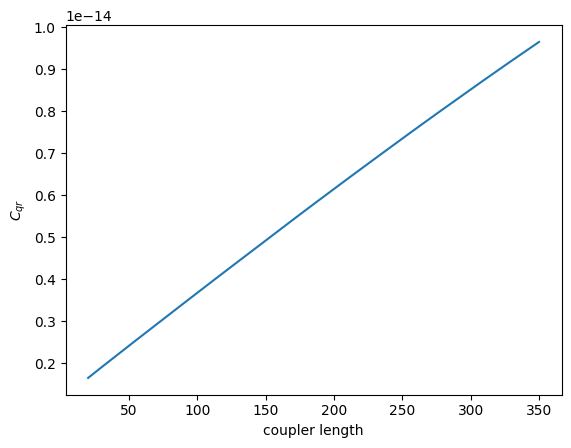

In [5]:
plt.plot(coupler_widths, c_qrs)
plt.ylabel(r"$C_{qr}$")
plt.xlabel("coupler length")